In [1]:
# -------------------------------------------------------------------------------------
# Third party imports
# -------------------------------------------------------------------------------------
import copy
import glob
import importlib
import inspect
import os
import sys
import warnings
from datetime import datetime

import astropy
import matplotlib.pyplot as plt
import numpy as np
from astropy import constants as c
from astropy import units as u
from astropy import wcs
from astropy.constants import R_earth, R_sun
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import (
    FK5,
    GCRS,
    ICRS,
    BarycentricMeanEcliptic,
    BarycentricTrueEcliptic,
    GeocentricMeanEcliptic,
    GeocentricTrueEcliptic,
    HeliocentricEclipticIAU76,
    HeliocentricMeanEcliptic,
    HeliocentricTrueEcliptic,
)
from astropy.io import fits
from astropy.nddata import CCDData
from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from ccdproc import wcs_project  # , Combiner
from matplotlib.colors import LogNorm
from tqdm import tnrange

import matplotlib

# from IPython.display import display, Markdown, clear_output

warnings.filterwarnings("ignore")

# Plot setup
matplotlib.rc("font", size=22, family="serif", weight="bold")
plt.rcParams["figure.figsize"] = [10, 4]
np.printoptions(suppress=True)

In [2]:
# Local imports
sys.path.append(os.path.join(os.path.split(os.getcwd())[0], "shifty"))
import imagehandler

In [3]:
import cleaner

importlib.reload(cleaner)

<module 'cleaner' from '/arc/home/mikea/Github/shifty/shifty/cleaner.py'>

### CFHT image

In [50]:
import cleaner

importlib.reload(cleaner)
filenames = sorted(glob.glob("/arc/home/mikea/Github/shifty/dev_data/2615*.fits"))[0::]
C = cleaner.DataCleaner(
    filenames[:25],
    extno=1,
    EXPTIME=300,
    EXPUNIT="s",
    MAGZERO=18.0,
    MJD_START="2400000.5",
    GAIN=2,
    FILTER="-Tess",
    verbose=False,
)
C.rough_align(C.cleaned_data, 0)
# C.reproject_data(C.cleaned_data, 0)
# C.save_cleaned('clean0')

Reading image 4: /arc/home/mikea/Github/shifty/dev_data/2615565p.fits
Read 5 files!
Aligning and padding image 4
Done


In [51]:
C.subtract_background_level(C.cleaned_data)
C.save_cleaned("clean1")

Subtracting background level in image 4
Done
1

Done!


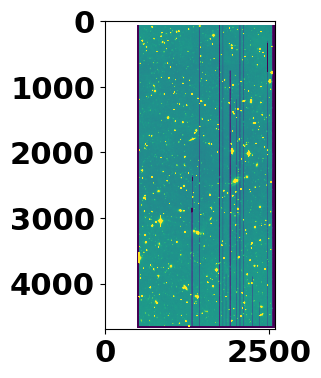

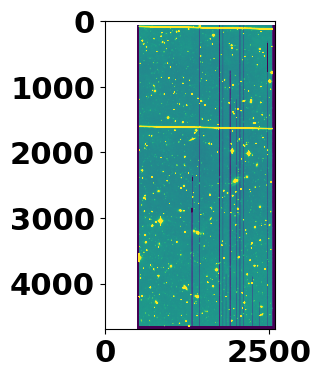

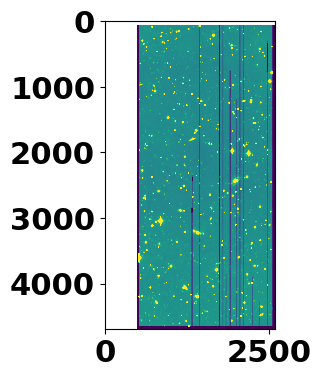

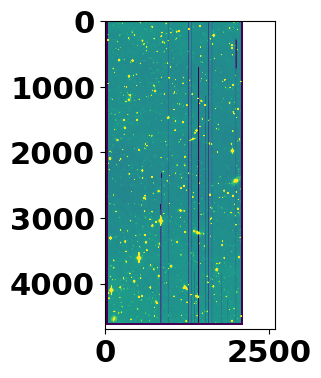

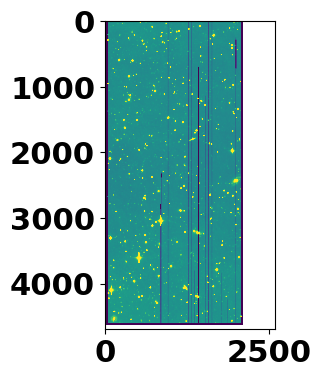

<Figure size 1000x400 with 0 Axes>

In [52]:
from astropy.visualization import ImageNormalize, ZScaleInterval

for i, dat in enumerate(C.cleaned_data.data):
    plt.imshow(dat, norm=ImageNormalize(dat, interval=ZScaleInterval()))
    plt.figure()

### TESS

In [5]:
import sys
import tracemalloc

import psutil

In [6]:
tracemalloc.start()

In [22]:
import cleaner

importlib.reload(cleaner)
# filenames=sorted(glob.glob('/arc/home/mikea/Github/shifty/dev_data/2615*.fits'))[0::]
# filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::]
filenames = sorted(glob.glob("/arc/home/mikea/Github/shifty/notebooks/planted_b_*.fits"))#[0:10:]
C = cleaner.DataCleaner(
    filenames,
    extno=0,
    EXPTIME="EXPOSURE",
    EXPUNIT="d",
    MAGZERO=18.0,
    MJD_START="BJDREFI+TSTART+-2400000.5",
    GAIN="GAINA",
    FILTER="-Tess",
    verbose=False,
)
print(tracemalloc.get_traced_memory())
C.rough_align(0)
print(tracemalloc.get_traced_memory())
C.reproject_data(0)
print(tracemalloc.get_traced_memory())
C.save_cleaned("clean00b")
# C.subtract_background_level(C.cleaned_data)
# print(tracemalloc.get_traced_memory())
# C.save_cleaned('clean01')

Reading image 1107: /arc/home/mikea/Github/shifty/notebooks/planted_b_1107.fits
Read 1108 files!
Done!
(19860412500, 19860828748)
Aligning and padding image 1107
Done
(19874420023, 39547070958)
Aligning and padding image 1107
Done


KeyboardInterrupt: 

In [ ]:
import cleaner

importlib.reload(cleaner)
filenames = sorted(glob.glob("/arc/home/mikea/Github/shifty/dev_data/2615*.fits"))[0::]
filenames = sorted(glob.glob("./clean00_????.fits"))[0::]
#filenames = sorted(glob.glob("./clean00b_??.fits"))[0::]
print(len(filenames), "files")
'''C = cleaner.DataCleaner(
    filenames,
    extno=0,
    EXPTIME="EXPOSURE",
    EXPUNIT="d",
    MAGZERO=18.0,
    MJD_START="BJDREFI+TSTART+-2400000.5",
    GAIN="GAINA",
    FILTER="-Tess",
    verbose=False,
)'''
print(tracemalloc.get_traced_memory())
C.subtract_background_level()
print(tracemalloc.get_traced_memory())
C.save_cleaned("clean01b")

In [ ]:
import cleaner

importlib.reload(cleaner)
filenames = sorted(glob.glob("/arc/home/mikea/Github/shifty/dev_data/2615*.fits"))[0::]
filenames = sorted(glob.glob("./clean01_????.fits"))[0::]
#filenames = sorted(glob.glob("./clean01b_??.fits"))[0::]
print(len(filenames), "files")
'''C = cleaner.DataCleaner(
    filenames,
    extno=0,
    EXPTIME="EXPOSURE",
    EXPUNIT="d",
    MAGZERO=18.0,
    MJD_START="BJDREFI+TSTART+-2400000.5",
    GAIN="GAINA",
    FILTER="-Tess",
    verbose=False,
)'''
print(tracemalloc.get_traced_memory())
C.mask_bright_sources(20000, 4)  # Large mask around very bright sources
C.mask_bright_sources(2000, 1.0) # Smaller mask around lesser bright sources
print(tracemalloc.get_traced_memory())
print(np.sum(np.isnan(C.cleaned_data.data))/(np.product(np.shape(C.cleaned_data.data))))
C.save_cleaned("clean01.5b")

1108 files
(20101541530, 39547583139)
(20101540903, 49645048379)
0.010454854314686046
4


In [20]:
import cleaner

importlib.reload(cleaner)

filenames = sorted(glob.glob("clean01_????.fits"))[0:547:]
#filenames = sorted(glob.glob("clean01.5b_????.fits"))[0:547:]
C = cleaner.DataCleaner(
    filenames,
    extno=0,
    EXPTIME="EXPOSURE",
    EXPUNIT="d",
    MAGZERO=18.0,
    MJD_START="BJDREFI+TSTART+-2400000.5",
    GAIN="GAINA",
    FILTER="-Tess",
    verbose=False,
)
print(tracemalloc.get_traced_memory())
C.subtract_background_level()
print(tracemalloc.get_traced_memory())
C.template_subtract('donut', usemean=False, ninner=25, nouter=100)
print(tracemalloc.get_traced_memory())
C.subtract_background_level()
print(tracemalloc.get_traced_memory())
C.save_cleaned("clean020_a")

filenames = sorted(glob.glob("clean01_????.fits"))[547::]
#filenames = sorted(glob.glob("clean01.5b_????.fits"))[547::]
C = cleaner.DataCleaner(
    filenames,
    extno=0,
    EXPTIME="EXPOSURE",
    EXPUNIT="d",
    MAGZERO=18.0,
    MJD_START="BJDREFI+TSTART+-2400000.5",
    GAIN="GAINA",
    FILTER="-Tess",
    verbose=False,
)
print(tracemalloc.get_traced_memory())
C.subtract_background_level()
print(tracemalloc.get_traced_memory())
C.template_subtract('donut', usemean=False, ninner=25, nouter=100)
print(tracemalloc.get_traced_memory())
C.subtract_background_level()
print(tracemalloc.get_traced_memory())
C.save_cleaned("clean020_b")

Reading image 546: clean01_0546.fits
Read 547 files!
Done!
(29470149854, 64827852539)
Subtracting background level in image 546
Done
(29470472653, 64827852539)
Subtracting template from image 546
Done
(29470722074, 64827852539)
Subtracting background level in image 546
Done
(29470975325, 64827852539)
3

Done!
Reading image 560: clean01_1107.fits
Read 561 files!
Done!
(29720976954, 64827852539)
Subtracting background level in image 560
Done
(29721307779, 64827852539)
Subtracting template from image 560
Done
(29721562148, 64827852539)
Subtracting background level in image 560
Done
(29721821809, 64827852539)
3

Done!


In [16]:
np.median(C.cleaned_data.data)

0.002861023

In [18]:
p=np.median(C.cleaned_data.data,2)
print(len(p), p)

561 [[ 0.705513    0.69382477  0.68647003 ... -1.3661499  -1.377655
  -1.3741913 ]
 [ 0.80776215  0.753479    0.7632599  ... -1.2080688  -1.2071228
  -1.2072678 ]
 [ 0.7707596   0.77902985  0.7657776  ... -1.1807022  -1.1844788
  -1.1840668 ]
 ...
 [-0.1797409  -0.15087128 -0.16501617 ...  0.29701996  0.30149078
   0.3000183 ]
 [-0.17918396 -0.1529541  -0.15274811 ...  0.31080627  0.31232452
   0.30817413]
 [-0.20724487 -0.15111542 -0.15607452 ...  0.29370117  0.29283905
   0.29534912]]


In [10]:
import sys
import tracemalloc

import cleaner
import psutil

tracemalloc.start()
importlib.reload(cleaner)
filenames = sorted(glob.glob("clean02_?_???.fits"))[0::]
print(f"Reading {len(filenames)} files.")
try:
    del C
except:
    pass

C = cleaner.DataCleaner(
    filenames[:],
    extno=0,
    EXPTIME="EXPOSURE",
    EXPUNIT="d",
    MAGZERO=18.0,
    MJD_START="BJDREFI+TSTART+-2400000.5",
    GAIN="GAINA",
    FILTER="-Tess",
    verbose=False,
)
print(tracemalloc.get_traced_memory())
C.mask_outliers()
print(tracemalloc.get_traced_memory())
C.save_cleaned("clean03")

Reading 1104 files.
Reading image 1103: clean02_b_556.fits
Read 1104 files!
Done!
(19800847361, 22620296748)
0 1.5653555 72141 1104
1 0.6519007 42537 1102
2 0.51502794 20288 1084
3 0.4897475 13224 963
4 0.48455378 4159 716
5 0.48342794 1057 420
6 0.48317224 256 258
7 0.48311248 87 155
8 0.48309803 28 88
9 0.4830943 12 24
10 0.48309353 6 2
11 0.48309344 3 0
(19800872825, 54106950447)
4

Done!


In [12]:
m = []
for i, d in enumerate(C.cleaned_data.data):
    m.append(
        np.sum(np.isnan(d))
        / (np.shape(C.cleaned_data.data[0])[0] * np.shape(C.cleaned_data.data[0])[1])
    )
    print(f"{filenames[i]} {m[i]*100:3.0f}")
print(np.mean(m), np.std(m))

clean02_a_000.fits   3
clean02_a_001.fits   3
clean02_a_002.fits   3
clean02_a_003.fits   3
clean02_a_004.fits   3
clean02_a_005.fits   3
clean02_a_006.fits   3
clean02_a_007.fits   3
clean02_a_008.fits   3
clean02_a_009.fits   3
clean02_a_010.fits   3
clean02_a_011.fits   3
clean02_a_012.fits   3
clean02_a_013.fits   3
clean02_a_014.fits   3
clean02_a_015.fits   3
clean02_a_016.fits   3
clean02_a_017.fits   3
clean02_a_018.fits   3
clean02_a_019.fits   3
clean02_a_020.fits   3
clean02_a_021.fits   3
clean02_a_022.fits   3
clean02_a_023.fits   3
clean02_a_024.fits   3
clean02_a_025.fits   3
clean02_a_026.fits   3
clean02_a_027.fits   3
clean02_a_028.fits   3
clean02_a_029.fits   3
clean02_a_030.fits   3
clean02_a_031.fits   3
clean02_a_032.fits   3
clean02_a_033.fits   3
clean02_a_034.fits   3
clean02_a_035.fits   3
clean02_a_036.fits   3
clean02_a_037.fits   3
clean02_a_038.fits   2
clean02_a_039.fits   3
clean02_a_040.fits   2
clean02_a_041.fits   2
clean02_a_042.fits   2
clean02_a_0

In [40]:
D.save_cleaned("clean03")

4

Done!


In [42]:
a = (4 > 5) | (4 < 5)

In [43]:
a

True

In [15]:
D.cleaned_data.WCS[0].all_pix2world(2091.4858, 21.5561, 0)

[array(53.20070765), array(12.84132748)]

In [4]:
import imagehandler
import cleaner
#rreload(imagehandler)
#rreload(cleaner)
# filenames=sorted(glob.glob('/arc/home/mikea/Github/shifty/dev_data/2615*.fits'))[0::]
# filenames=sorted(glob.glob('/arc/home/mikea/.shifty_data/tess/5/1/4/tess20183??????*.fits'))[0::]
filenames = sorted(glob.glob("/arc/home/mikea/Github/shifty/notebooks/planted_b_*.fits"))[0:2:]
filenames = sorted(glob.glob("clean01_????.fits"))[0:2:]
C = cleaner.DataCleaner(
    filenames,
    extno=0,
    EXPTIME="EXPOSURE",
    EXPUNIT="d",
    MAGZERO=18.0,
    MJD_START="BJDREFI+TSTART+-2400000.5",
    GAIN="GAINA",
    FILTER="-Tess",
    verbose=False,
    #xycuts=[0, 2136, 0, 2078]
    xycuts=[44, 2092, 0, 2048]
)

Reading image 1: clean01_0001.fits
Read 2 files!
Done!


In [5]:
D=copy.deepcopy(C)
E=copy.deepcopy(C)
C.subtract_background_level(mode='sep')
D.subtract_background_level(mode='median')
E.subtract_background_level(mode='mean')

Subtracting background level in image 1
Done
Subtracting background level in image 1
Done
Subtracting background level in image 1
Done


In [6]:
print(np.shape(C.cleaned_data.data), C.cleaned_data.header[0]['NAXIS1'], C.cleaned_data.header[0]['NAXIS2'])
print(np.shape(D.cleaned_data.data), D.cleaned_data.header[0]['NAXIS1'], D.cleaned_data.header[0]['NAXIS2'])

(2, 2048, 2048) 2048 2048
(2, 2048, 2048) 2048 2048


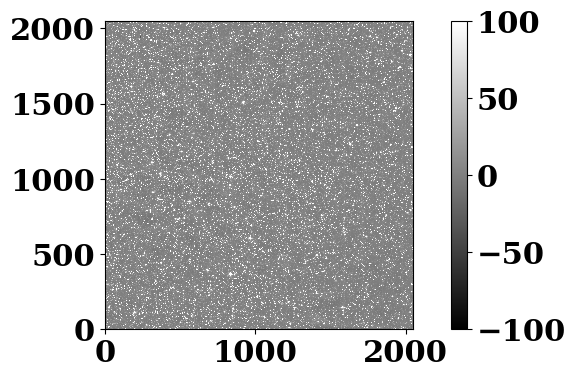

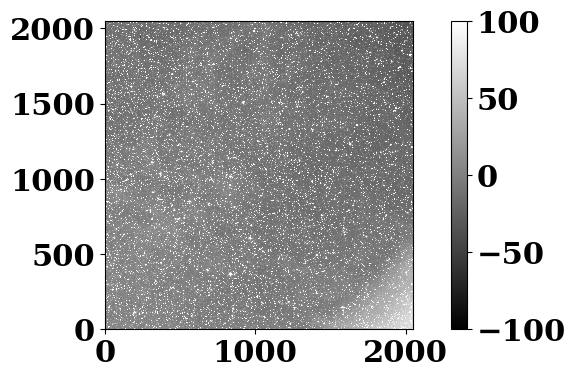

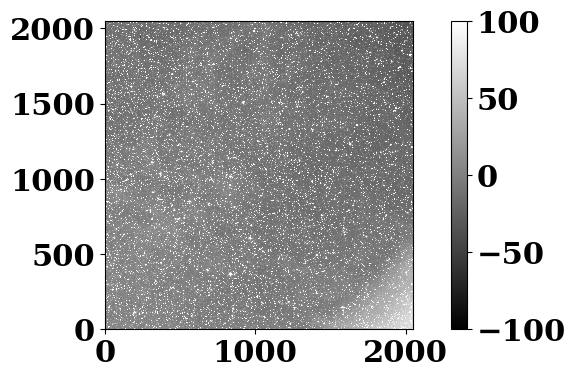

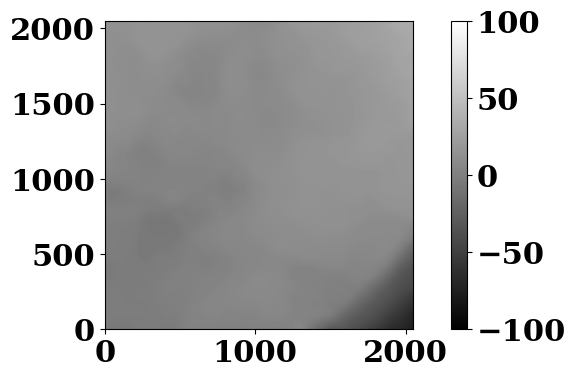

In [8]:
plt.figure()
plt.imshow(C.cleaned_data.data[0], interpolation='nearest', cmap='gray', origin='lower', vmin=-100, vmax=100); plt.colorbar()
plt.figure()
plt.imshow(D.cleaned_data.data[0], interpolation='nearest', cmap='gray', origin='lower', vmin=-100, vmax=100); plt.colorbar()
plt.figure()
plt.imshow(E.cleaned_data.data[0], interpolation='nearest', cmap='gray', origin='lower', vmin=-100, vmax=100); plt.colorbar()
plt.figure()
plt.imshow(C.cleaned_data.data[0]-E.cleaned_data.data[0], interpolation='nearest', cmap='gray', origin='lower', vmin=-100, vmax=100); plt.colorbar()

In [179]:
np.shape(D.cleaned_data.data),np.shape(C.cleaned_data.data)

((2, 2078, 2136), (2, 2078, 2078))